# Problem Description

Build and validate diffrenet ML models for concrete strength prediction based on its composition. The objective is to apply feature engineering and model tuning to obtain 85% to 95% accuracy in model prediction.

The concrete compressive strength is a highly nonlinear function of age and ingredients The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).

* Cement: Cement (component 1) -- Kilogram in a meter-cube mixture -- Input Variable [DataType: Quantitative]
* Blast Furnace Slag: Blast Furnace Slag (component 2) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
* Fly Ash: Fly Ash (component 3) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
* Water: Water (component 4) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
* Superplasticizer: Superplasticizer (component 5) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
* Coarse Aggregate: Coarse Aggregate (component 6) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
* Fine Aggregate: Fine Aggregate (component 7) -- kg in a m3 mixture -- Input Variable [DataType: Quantitative]
* Age: Age-Day(1-365) -- Input Variable [DataType: Quantitative]
* Concrete compressive strength: Concrete compressive strength -- MegaPascals -- Output Variable [DataType: Quantitative]

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


The description of different feature is given below:

In [3]:
features=pd.DataFrame({
    'Name':['Cement (cement)', 'Blast Furnace Slag (slag)', 'Fly Ash (ash)', 'Water (water)', 
            'Superplasticizer (superplastic)', 'Coarse Aggregate (coarseagg)', 'Fine Aggregate (fineagg)',
            'Age (age)', 'Concrete Compressive Strength (strength)'],
    'Data Type': ['quantitative']*9, 
    'Measurement': ['kg in a m3 mixture']*7+['Day (1~365)', 'MPa'],
    'Description': ['Input Variable']*8+['Output Variable']
})
features

,Name,Data Type,Measurement,Description
0,Cement (cement),quantitative,kg in a m3 mixture,Input Variable
1,Blast Furnace Slag (slag),quantitative,kg in a m3 mixture,Input Variable
2,Fly Ash (ash),quantitative,kg in a m3 mixture,Input Variable
3,Water (water),quantitative,kg in a m3 mixture,Input Variable
4,Superplasticizer (superplastic),quantitative,kg in a m3 mixture,Input Variable
5,Coarse Aggregate (coarseagg),quantitative,kg in a m3 mixture,Input Variable
6,Fine Aggregate (fineagg),quantitative,kg in a m3 mixture,Input Variable
7,Age (age),quantitative,Day (1~365),Input Variable
8,Concrete Compressive Strength (strength),quantitative,MPa,Output Variable


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Comment:
* There are highly varying magnitudes or values or units
* if feature scaling is not done then our machine learning algorithm will tend to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values
* Slag, ash, and superplastic have minimum values as zero. These values can be zero in the composition of cement, so the zero values are valid here
* The minimum value of the age is 1. We can see that from the data description, the age is also valid as it ranges from 1 day to 365 days

In [6]:
# Checking for duplicated rows:

data.duplicated().sum()

25

In [7]:
data.loc[data.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [8]:
# dropping duplicated rows
data=data.drop_duplicates()

In [9]:
data.duplicated().any()

False

In [10]:
# Checking for missing data
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
# check the skewness of the data:

data.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

* Age is highly skewed

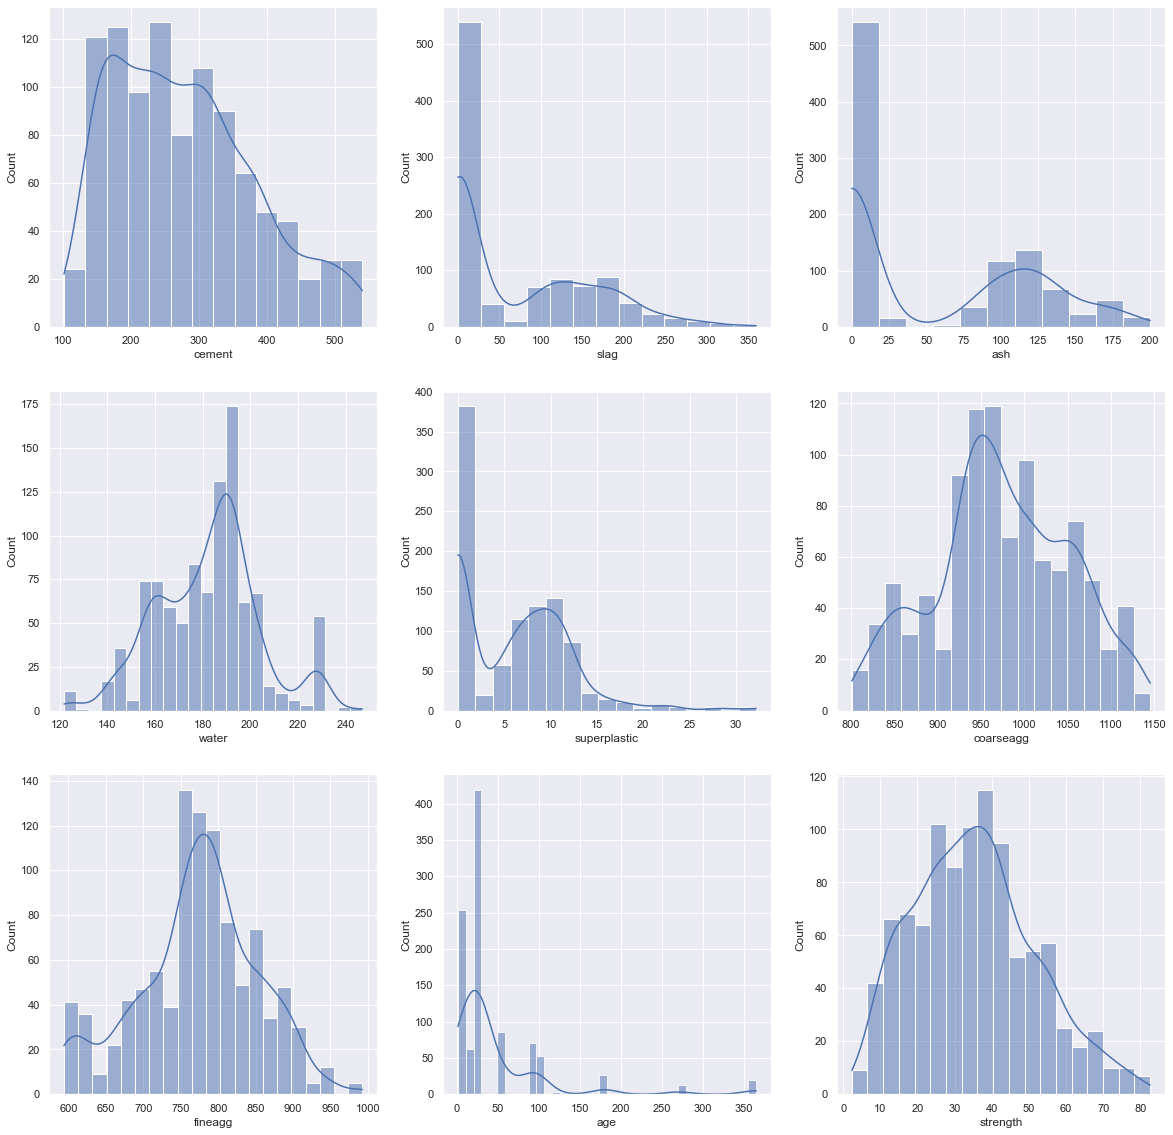

In [12]:
# distributions:
# plotting the histograms for different features
f, ax=plt.subplots(3,3, figsize=(20,20))
for i,c in enumerate(data.columns):
    sns.histplot(data[c], kde=True, ax=ax[i//3, i%3])

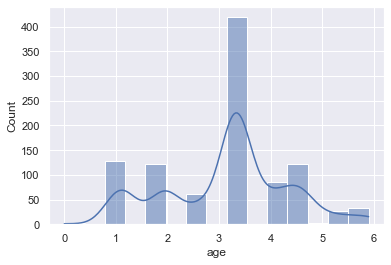

In [13]:
sns.histplot(np.log(data['age']), kde=True);

In [14]:
data['age']=np.log(data['age'])

In [15]:
# Bivariate EDA:

data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.001472,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.015848,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.016931,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.167384,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.040381,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.044466,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.114817,-0.186448
age,0.001472,-0.015848,-0.016931,0.167384,-0.040381,-0.044466,-0.114817,1.000000,0.562828
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.562828,1.000000


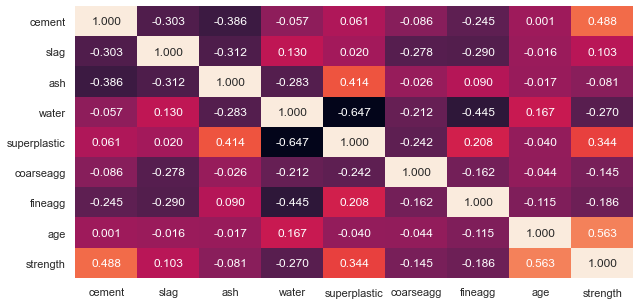

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.3f', cbar=False);

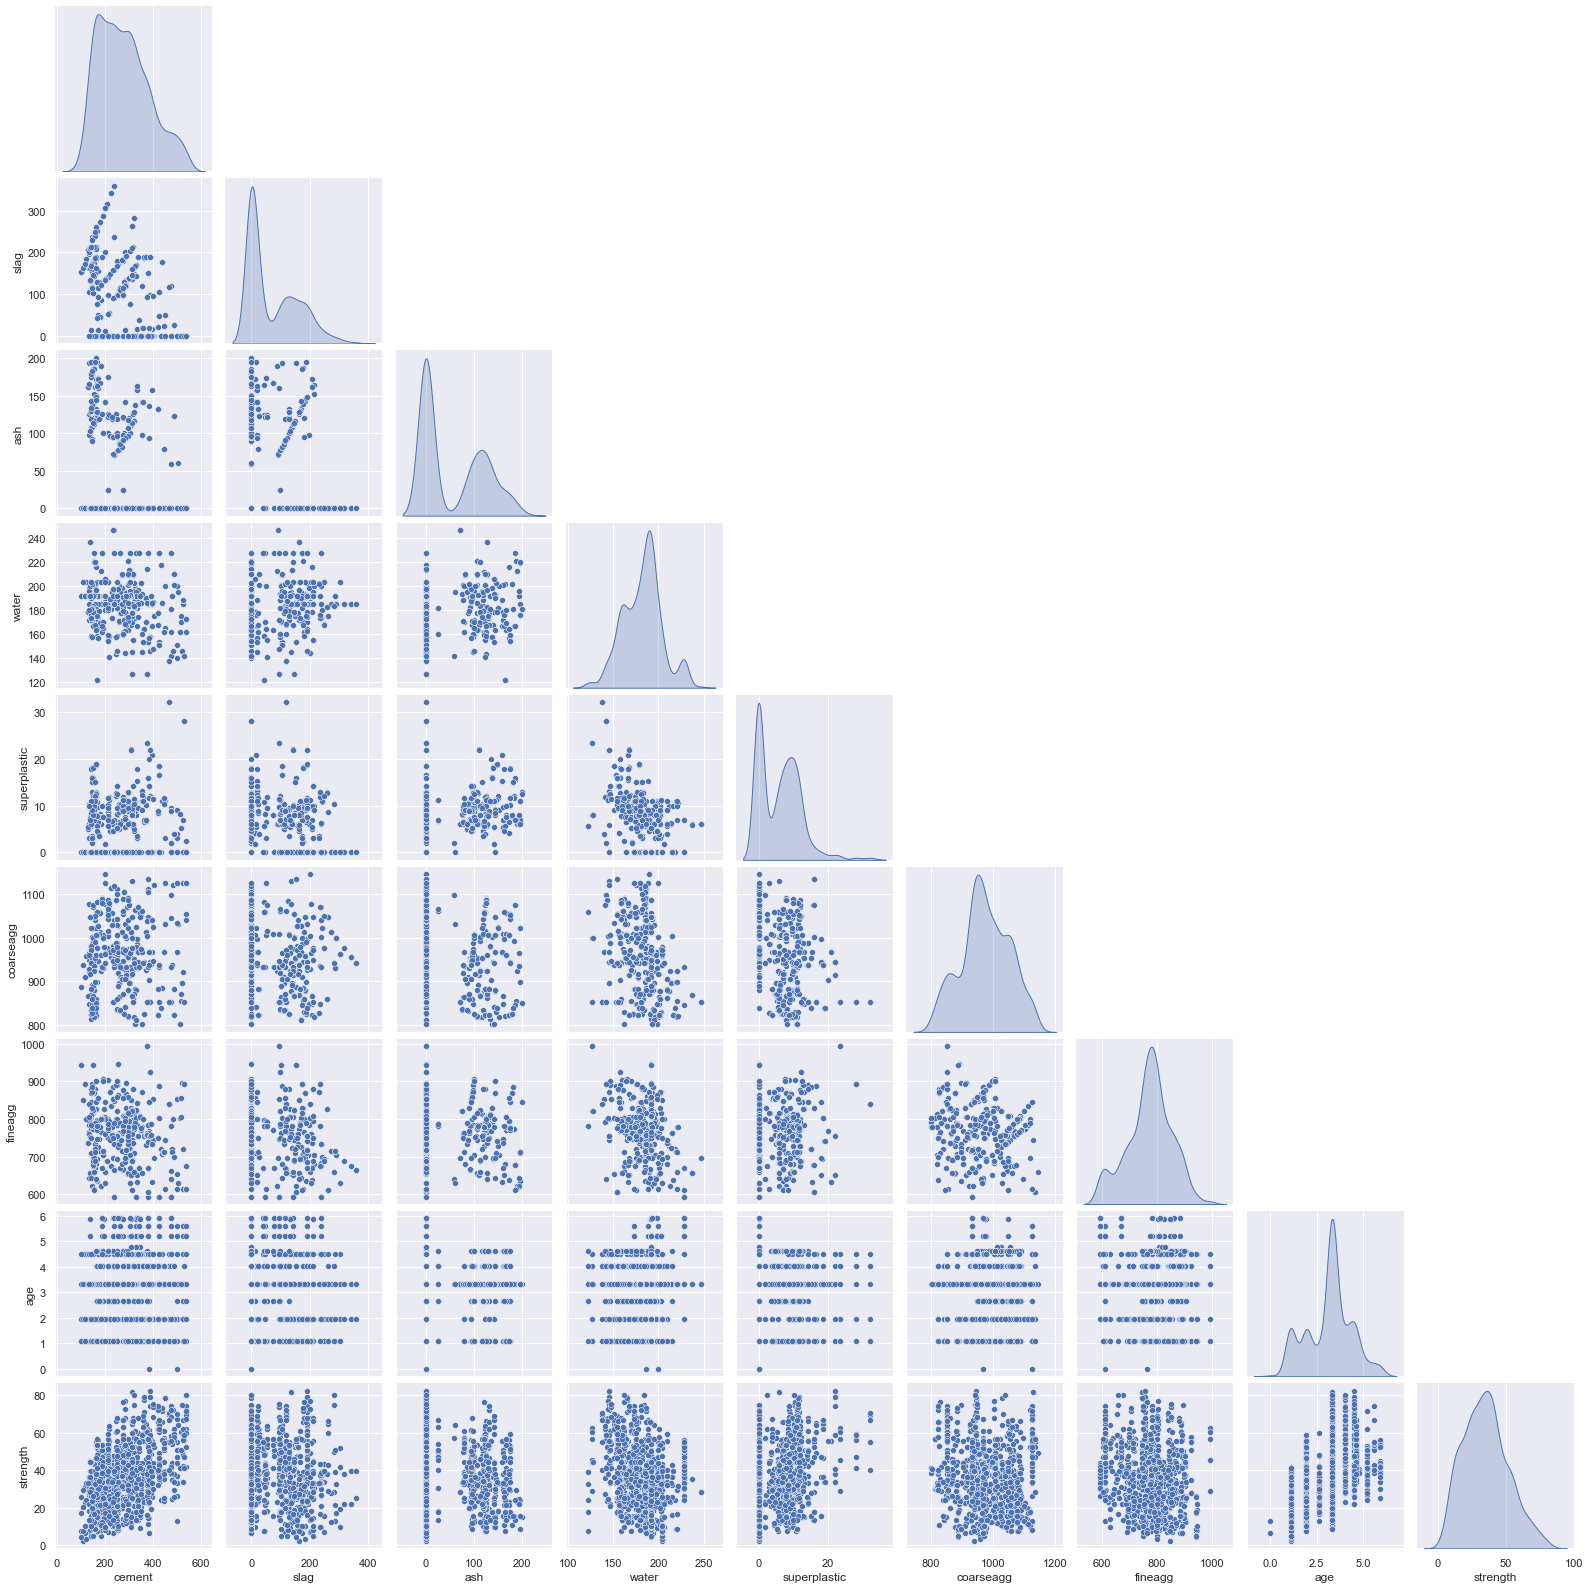

In [17]:
sns.pairplot(data, diag_kind='kde', corner=True);

## Insights:
* As age increasing strength increses
* Cement and strength have a linear relationship

In [18]:
# Extracting new columns:

data['water:cement'] = data['water']/data['cement']  #Extracting a new column the ratio of water to cement
data['coarseagg:fineagg'] = data['coarseagg']/data['fineagg']

In [19]:
data=data[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water:cement', 
           'coarseagg:fineagg', 'strength']]

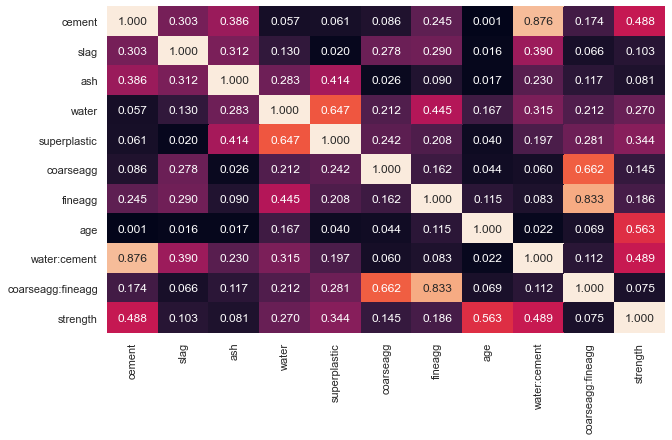

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(np.abs(data.corr()), annot=True, fmt='.3f', cbar=False);

In [21]:
# making ML models:

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [22]:
X=data.drop('strength', axis=1)
y=data['strength']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
# Degree 1
model=DecisionTreeRegressor(random_state=0)
model.fit(x_train,y_train)
print(f'training data score: {model.score(x_train, y_train)}')
print(f'test data score: {model.score(x_test, y_test)}')

training data score: 0.9961849259876323
test data score: 0.8704576074410804


In [25]:
# Degree 2
pipe=Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),
    ('model', DecisionTreeRegressor(random_state=0))
])
pipe.fit(x_train, y_train)
print(f'training data score: {pipe.score(x_train, y_train)}')
print(f'test data score: {pipe.score(x_test, y_test)}')

training data score: 0.9961849259876323
test data score: 0.8434487239824517


In [26]:
# Degree 3
pipe=Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('model', DecisionTreeRegressor(random_state=0))
])
pipe.fit(x_train,y_train)
print(f'training data score: {pipe.score(x_train, y_train)}')
print(f'test data score: {pipe.score(x_test, y_test)}')

training data score: 0.9961849259876323
test data score: 0.834024450955128


## Insights:

* As it is visible that highest score is in degree one so going forward with degree 1

## Different models for regression:
1. Linear regression
2. Decision Tree
3. Random Forest
4. Bagging
5. Adaboost
6. Gradient boosting
7. Neural Network

In [27]:
k=KFold(random_state=7, n_splits=5, shuffle=True)

# kfold will split the data in 5 equal parts

In [28]:
algo=[]
cv_r2_mean=[]
cv_r2_std=[]
cv_rmse_mean=[]

In [29]:
# Linear Regression

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
pipe.fit(x_train, y_train)
algo.append('Linear Regression')
cv=cross_val_score(pipe, X, y, cv=k)
cv_r2_mean.append(cv.mean())
cv_r2_std.append(cv.std())
cv_rmse_mean.append((-cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [30]:
# Decision Tree

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=0))
])
pipe.fit(x_train, y_train)
algo.append('Decision Tree')
cv=cross_val_score(pipe, X, y, cv=k)
cv_r2_mean.append(cv.mean())
cv_r2_std.append(cv.std())
cv_rmse_mean.append((-cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [31]:
# Random Forest

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=0))
])
pipe.fit(x_train, y_train)
algo.append('Random Forest')
cv=cross_val_score(pipe, X, y, cv=k)
cv_r2_mean.append(cv.mean())
cv_r2_std.append(cv.std())
cv_rmse_mean.append((-cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [32]:
# Bagging

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingRegressor(random_state=0))
])
pipe.fit(x_train, y_train)
algo.append('Bagging')
cv=cross_val_score(pipe, X, y, cv=k)
cv_r2_mean.append(cv.mean())
cv_r2_std.append(cv.std())
cv_rmse_mean.append((-cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [33]:
# Adaboost

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(random_state=0))
])
pipe.fit(x_train, y_train)
algo.append('Adaboost')
cv=cross_val_score(pipe, X, y, cv=k)
cv_r2_mean.append(cv.mean())
cv_r2_std.append(cv.std())
cv_rmse_mean.append((-cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [34]:
# Gradient boosting

pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=0))
])
pipe.fit(x_train, y_train)
algo.append('Gradient boosting')
cv=cross_val_score(pipe, X, y, cv=k)
cv_r2_mean.append(cv.mean())
cv_r2_std.append(cv.std())
cv_rmse_mean.append((-cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [35]:
# Neural network using tensorflow:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [36]:
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('pca', PCA(n_components=8))
])

x_tr=pipe.fit_transform(x_train)
x_te=pipe.transform(x_test)

In [37]:
model=Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

In [38]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [39]:

history=model.fit(x_tr,y_train,epochs=200,verbose=True, validation_split=0.2)

Epoch 1/200
21/21 [==============================] - 1s 36ms/step - loss: 1432.6888 - mse: 1432.6888 - mae: 34.2633 - val_loss: 1637.0973 - val_mse: 1637.0973 - val_mae: 36.7772
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 1482.8118 - mse: 1482.8118 - mae: 35.1104 - val_loss: 1602.0707 - val_mse: 1602.0707 - val_mae: 36.3186
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 1327.3513 - mse: 1327.3513 - mae: 32.9793 - val_loss: 1559.4982 - val_mse: 1559.4982 - val_mae: 35.7524
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 1272.7421 - mse: 1272.7421 - mae: 31.7453 - val_loss: 1508.5547 - val_mse: 1508.5547 - val_mae: 35.0638
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 1275.7487 - mse: 1275.7487 - mae: 31.8434 - val_loss: 1447.7188 - val_mse: 1447.7188 - val_mae: 34.2309
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 1213.9600 - mse: 1213.9600 - mae: 30.8329

21/21 [==============================] - 0s 2ms/step - loss: 70.8548 - mse: 70.8548 - mae: 6.6058 - val_loss: 83.8152 - val_mse: 83.8152 - val_mae: 7.1158
Epoch 49/200
21/21 [==============================] - 0s 2ms/step - loss: 68.8070 - mse: 68.8070 - mae: 6.4304 - val_loss: 83.0770 - val_mse: 83.0770 - val_mae: 7.0860
Epoch 50/200
21/21 [==============================] - 0s 2ms/step - loss: 67.2042 - mse: 67.2042 - mae: 6.3394 - val_loss: 81.8420 - val_mse: 81.8420 - val_mae: 7.0458
Epoch 51/200
21/21 [==============================] - 0s 2ms/step - loss: 59.8232 - mse: 59.8232 - mae: 5.8455 - val_loss: 81.4407 - val_mse: 81.4407 - val_mae: 7.0266
Epoch 52/200
21/21 [==============================] - 0s 2ms/step - loss: 67.5792 - mse: 67.5792 - mae: 6.4205 - val_loss: 81.2065 - val_mse: 81.2065 - val_mae: 7.0116
Epoch 53/200
21/21 [==============================] - 0s 2ms/step - loss: 69.1672 - mse: 69.1672 - mae: 6.3691 - val_loss: 81.0738 - val_mse: 81.0738 - val_mae: 6.9933
Epoch

Epoch 97/200
21/21 [==============================] - 0s 2ms/step - loss: 52.5890 - mse: 52.5890 - mae: 5.4884 - val_loss: 63.1120 - val_mse: 63.1120 - val_mae: 6.0736
Epoch 98/200
21/21 [==============================] - 0s 2ms/step - loss: 55.7489 - mse: 55.7489 - mae: 5.6978 - val_loss: 63.1124 - val_mse: 63.1124 - val_mae: 6.0687
Epoch 99/200
21/21 [==============================] - 0s 2ms/step - loss: 59.3206 - mse: 59.3206 - mae: 5.7348 - val_loss: 63.1982 - val_mse: 63.1982 - val_mae: 6.0662
Epoch 100/200
21/21 [==============================] - 0s 2ms/step - loss: 53.0110 - mse: 53.0110 - mae: 5.4426 - val_loss: 62.4639 - val_mse: 62.4639 - val_mae: 6.0346
Epoch 101/200
21/21 [==============================] - 0s 2ms/step - loss: 55.0221 - mse: 55.0221 - mae: 5.7197 - val_loss: 62.6329 - val_mse: 62.6329 - val_mae: 6.0319
Epoch 102/200
21/21 [==============================] - 0s 2ms/step - loss: 47.3173 - mse: 47.3173 - mae: 5.2316 - val_loss: 62.2925 - val_mse: 62.2925 - val_m

21/21 [==============================] - 0s 2ms/step - loss: 45.7697 - mse: 45.7697 - mae: 5.1117 - val_loss: 54.7458 - val_mse: 54.7458 - val_mae: 5.6275
Epoch 146/200
21/21 [==============================] - 0s 2ms/step - loss: 54.2270 - mse: 54.2270 - mae: 5.5033 - val_loss: 54.3362 - val_mse: 54.3362 - val_mae: 5.6041
Epoch 147/200
21/21 [==============================] - 0s 2ms/step - loss: 48.2010 - mse: 48.2010 - mae: 5.3259 - val_loss: 54.6731 - val_mse: 54.6731 - val_mae: 5.6111
Epoch 148/200
21/21 [==============================] - 0s 2ms/step - loss: 51.8092 - mse: 51.8092 - mae: 5.4837 - val_loss: 54.2926 - val_mse: 54.2926 - val_mae: 5.6087
Epoch 149/200
21/21 [==============================] - 0s 2ms/step - loss: 41.6464 - mse: 41.6464 - mae: 4.8979 - val_loss: 53.6696 - val_mse: 53.6696 - val_mae: 5.5884
Epoch 150/200
21/21 [==============================] - 0s 2ms/step - loss: 42.3187 - mse: 42.3187 - mae: 4.9786 - val_loss: 55.1746 - val_mse: 55.1746 - val_mae: 5.6330


21/21 [==============================] - 0s 2ms/step - loss: 39.3901 - mse: 39.3901 - mae: 4.8753 - val_loss: 50.2299 - val_mse: 50.2299 - val_mae: 5.3593
Epoch 194/200
21/21 [==============================] - 0s 2ms/step - loss: 41.0093 - mse: 41.0093 - mae: 4.9392 - val_loss: 49.1674 - val_mse: 49.1674 - val_mae: 5.3311
Epoch 195/200
21/21 [==============================] - 0s 2ms/step - loss: 47.9235 - mse: 47.9235 - mae: 5.2137 - val_loss: 49.6429 - val_mse: 49.6429 - val_mae: 5.3675
Epoch 196/200
21/21 [==============================] - 0s 2ms/step - loss: 47.0575 - mse: 47.0575 - mae: 5.1886 - val_loss: 48.0277 - val_mse: 48.0277 - val_mae: 5.3041
Epoch 197/200
21/21 [==============================] - 0s 2ms/step - loss: 46.0775 - mse: 46.0775 - mae: 5.1983 - val_loss: 48.4605 - val_mse: 48.4605 - val_mae: 5.3179
Epoch 198/200
21/21 [==============================] - 0s 2ms/step - loss: 42.4995 - mse: 42.4995 - mae: 4.9691 - val_loss: 49.2099 - val_mse: 49.2099 - val_mae: 5.3341


In [40]:
hist=history.history

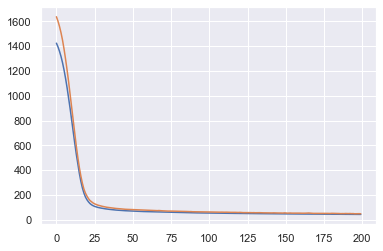

In [41]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])

In [42]:
x_tr.shape

(804, 8)

In [43]:
y_pred=model.predict(x_te)
r2_score(y_test, y_pred)
print(f'training data score: {r2_score(y_train, model.predict(x_tr))}')
print(f'test data score: {r2_score(y_test, model.predict(x_te))}')

training data score: 0.8367651307306172
test data score: 0.7985242378092442


In [44]:
model.evaluate(x_te, y_test)

7/7 [==============================] - 0s 671us/step - loss: 48.5502 - mse: 48.5502 - mae: 5.2194


[48.55024337768555, 48.55024337768555, 5.219409942626953]

In [45]:
# Dataframe to compare the results:

df=pd.DataFrame({'model':algo,
                'r2_mean':cv_r2_mean,
                'r2_std':cv_r2_std,
                'rmse_mean':cv_rmse_mean})
df.sort_values(by='r2_mean', ascending=False)

,model,r2_mean,r2_std,rmse_mean
2,Random Forest,0.908324,0.017312,4.936898
5,Gradient boosting,0.907949,0.016067,4.941899
3,Bagging,0.890887,0.017634,5.386899
1,Decision Tree,0.850115,0.029068,6.299695
0,Linear Regression,0.812720,0.022433,7.035060
4,Adaboost,0.794602,0.017578,7.361124


## Insights:
* Gradient boosting is the best model here
* Bagging and Random Forest are almost the same, second best algorithms

In [46]:
# Grid search to improve the performance of Random Forest Regressor:

rf = RandomForestRegressor(random_state=0)

params={
    'bootstrap': [True, False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1,3,4],
    'min_samples_split': [2,3,5],
    'n_estimators': [4,25,50]    
}

grid=GridSearchCV(estimator=rf, param_grid=params,cv=k)
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 25, 50]})

In [47]:
model=['Random forest after grid search']
tr=[grid.score(x_train, y_train)]
te=[grid.score(x_test, y_test)]
rmse=[(mean_squared_error(y_test, grid.predict(x_test)))**0.5]

In [48]:
# Random search on Gradient Boosting:

gb=GradientBoostingRegressor(random_state=0)
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=0)

In [49]:
n_estimators=[int(x) for x in np.linspace(start=50, stop=150, num=25)]
max_features=['log2', 'sqrt']
max_depth=[int(x) for x in np.linspace(5,10,5)]
max_depth.append(None)
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[1,2,3,4]
learning_rate=[float(x) for x in np.linspace(0.1, 1, 10)]


params_rs={'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'learning_rate': learning_rate}

random=RandomizedSearchCV(estimator=gb, param_distributions=params_rs, cv=k, random_state=7)
random.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=GradientBoostingRegressor(random_state=0),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                          

In [50]:
model.append('Gradient Boosting after RandomCV')
tr.append(random.score(x_train, y_train))
te.append(random.score(x_test, y_test))
rmse.append((mean_squared_error(y_test, random.predict(x_test)))**0.5)

In [51]:
results=pd.DataFrame({
    'Model': model,
    'Training score': tr,
    'Testing score': te,
    'RMSE': rmse
})
results

,Model,Training score,Testing score,RMSE
0,Random forest after grid search,0.996185,0.922207,4.329674
1,Gradient Boosting after RandomCV,0.995741,0.933159,4.013351


Gradient Boosting gives better results after hyperparameter tuning as well

Hence our final model was able to explain 93.08% variance explained by model